<a href="https://colab.research.google.com/github/zain4cs/Student-Score-Prediction/blob/main/Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install opendatasets

In [ ]:
# import opendatasets as od
# od.download("https://www.kaggle.com/datasets/mrsimple07/student-exam-performance-prediction")


__________________________________________

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np

url = "/content/drive/MyDrive/Datasets/student_exam_data (1).csv"
df = pd.read_csv(url)
df.head()



,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Study Hours,0
Previous Exam Score,0
Pass/Fail,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [ ]:
df_copy = df.copy()
df_filter = {}
for col in df_copy:
  q1 = df_copy[col].quantile(0.25)
  q3 = df_copy[col].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1-1.5*iqr
  upper_bound = q3+1.5*iqr
  outliers = df_copy[(df_copy[col]<=lower_bound)|(df_copy[col]>=upper_bound)]
  df_filter[col] = len(outliers)

  df_series = pd.Series(df_filter).sort_values(ascending=False)

df_series


,0
Study Hours,0
Previous Exam Score,0
Pass/Fail,0


In [ ]:
total_dup = df[df.duplicated(keep=False)]
print("Total Duplication of Rows", total_dup)

Total Duplication of Rows Empty DataFrame
Columns: [Study Hours, Previous Exam Score, Pass/Fail]
Index: []


<Axes: >

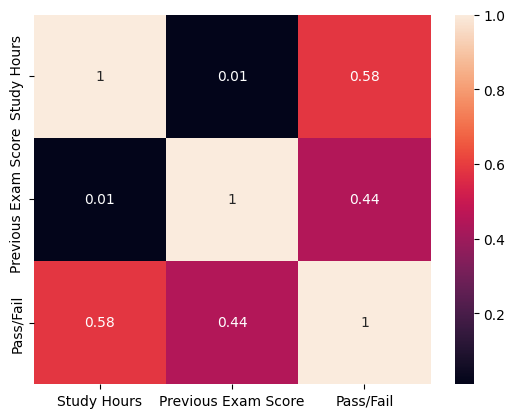

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='rocket')

<Axes: xlabel='Study Hours', ylabel='Count'>

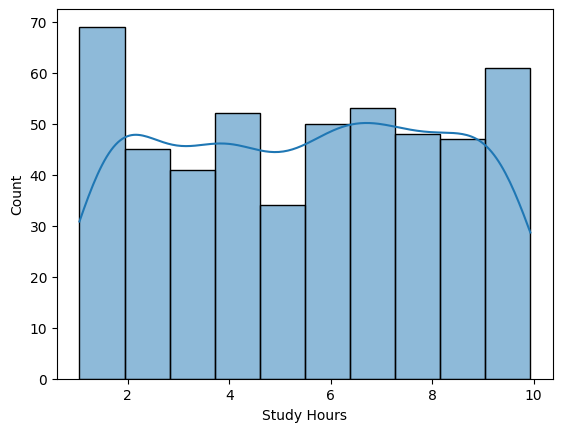

In [ ]:
sns.histplot(df['Study Hours'], kde=True)

<Axes: ylabel='Study Hours'>

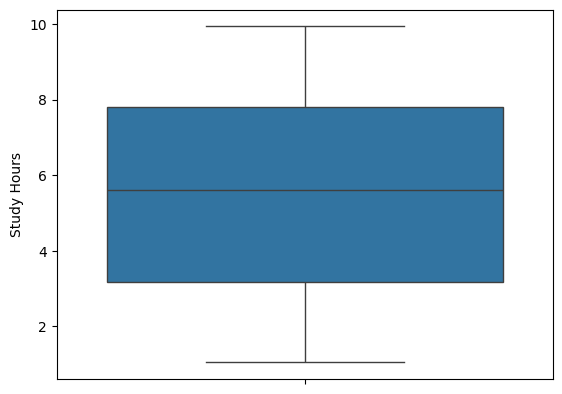

In [ ]:
sns.boxplot(df['Study Hours'])

<Axes: xlabel='Study Hours', ylabel='Previous Exam Score'>

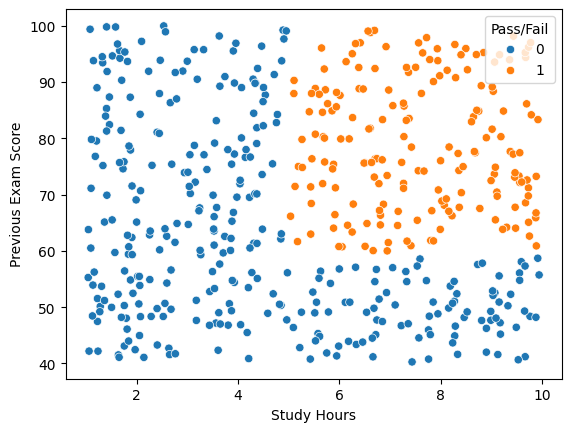

In [ ]:
sns.scatterplot(x='Study Hours', y='Previous Exam Score', hue='Pass/Fail', data=df)

<Axes: xlabel='Pass/Fail', ylabel='Study Hours'>

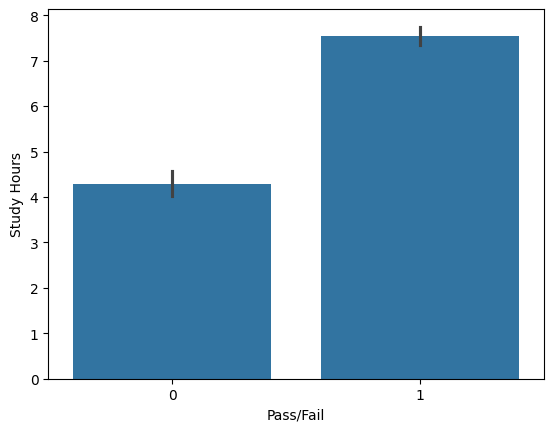

In [ ]:
sns.barplot(x='Pass/Fail', y='Study Hours', data=df)

_________________________

**Model Training + Predictions + Evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report

In [ ]:
df.columns

Index(['Study Hours', 'Previous Exam Score', 'Pass/Fail'], dtype='object')

In [ ]:
x = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [ ]:
df_length = len(df[['Study Hours','Previous Exam Score','Pass/Fail']])
df_length

500

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
log_pred = log_model.predict(x_test)
rf_pred = rf_model.predict(x_test)

In [ ]:
print("Logistic Regression Accuracy!", accuracy_score(y_test, log_pred))
print("Random Forest Accuracy!", accuracy_score(y_test, rf_pred))

Logistic Regression Accuracy! 0.92
Random Forest Accuracy! 1.0


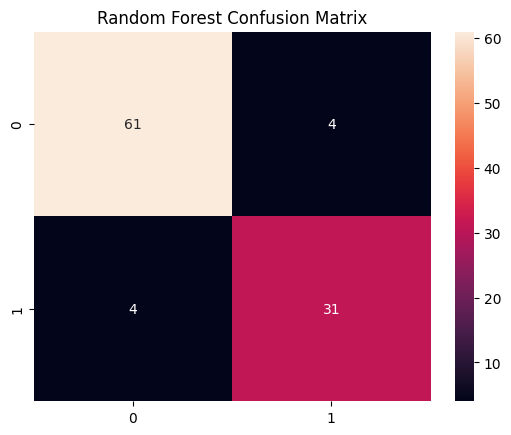

In [ ]:
cm = confusion_matrix(y_test, log_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
print("\n Classification Reprot (Random Forest)")
print(classification_report(y_test, log_pred))


 Classification Reprot (Random Forest)
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        65
           1       0.89      0.89      0.89        35

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100

